In [424]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import sklearn
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb 
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning)

In [425]:
path = 'input/tradeTimeInfo.csv'
path2='input/tradeTimeInfo2.csv'

In [426]:
df = pd.read_csv(path).drop(columns='Unnamed: 0')
df2 = pd.read_csv(path2).drop(columns='Unnamed: 0')
print(df.columns)
print(df2.columns)
df.T

Index(['carid', 'pushPrice', 'isTraded', 'predPrice', 'isCut', 'cutNum',
       'cutPrice1', 'cutPrice2', 'cutPrice3', 'dFirstCutTime',
       'dSecondCutTime', 'dThirdCutTime', 'dCutTime', 'dFirstCutPrice',
       'dSecondCutPrice', 'dThirdCutPrice', 'dCutPrice', 'dTruePrice',
       'pTruePrice', 'pFristCutPrice', 'pSecondCutPrice', 'pThirdCutPrice',
       'pCutPrice', 'pFirstAllTime', 'pSecondAllTime'],
      dtype='object')
Index(['carid', 'pushPrice', 'isTraded', 'predPrice', 'isCut', 'cutNum',
       'cutPrice1', 'cutPrice2', 'cutPrice3', 'dFirstCutTime',
       'dSecondCutTime', 'dThirdCutTime', 'dCutTime', 'dFirstCutPrice',
       'dSecondCutPrice', 'dThirdCutPrice', 'dCutPrice', 'dTruePrice',
       'pTruePrice', 'pFristCutPrice', 'pSecondCutPrice', 'pThirdCutPrice',
       'pCutPrice', 'pFirstAllTime', 'pSecondAllTime'],
      dtype='object')


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
carid,68603.000000,12312.000000,57655.000000,45688.000000,52081.000000,6729.000000,766.000000,10453.000000,65800.000000,36776.000000,...,63059.000000,63469.000000,45307.000000,57147.000000,17286.000000,10177.000000,54312.000000,45597.000000,38629.000000,58619.000000
pushPrice,3.980000,4.500000,23.900000,20.579800,12.280000,18.500000,9.800000,10.800000,12.280000,16.800000,...,2.000000,11.800000,9.900000,11.380000,16.800000,22.880000,12.300000,15.380000,36.880000,39.380000
isTraded,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
predPrice,4.571188,5.326470,24.260490,26.192541,12.397629,16.249944,9.782567,11.366560,11.435832,17.419523,...,2.048355,12.571402,9.504020,11.201090,16.234233,21.471404,12.486524,15.236936,36.064669,35.530893
isCut,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
cutNum,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.000000
cutPrice1,3.980000,4.500000,23.000000,20.579800,11.900000,17.680000,9.800000,10.800000,12.280000,16.800000,...,2.000000,11.800000,9.900000,11.380000,16.400000,22.880000,12.300000,15.380000,36.600000,38.600000
cutPrice2,3.980000,4.500000,23.000000,20.579800,11.900000,17.879900,9.800000,10.800000,12.280000,16.800000,...,2.000000,11.800000,9.900000,11.380000,15.900000,22.880000,12.300000,15.380000,36.600000,38.000000
cutPrice3,3.980000,4.500000,23.000000,20.579800,11.900000,16.879900,9.800000,10.800000,12.280000,16.800000,...,2.000000,11.800000,9.900000,11.380000,15.700000,22.880000,12.300000,15.380000,36.600000,38.000000
dFirstCutTime,0.000000,0.000000,23.000000,0.000000,21.000000,27.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000,2.000000


In [427]:
df = df[df['pTruePrice'] <= 0.5]
df2 = df2[df2['pTruePrice'] <= 0.5]

In [428]:
df = df[df['isTraded'] == 1]
df2 = df2[df2['isTraded'] == 1]

In [429]:
df.drop(columns='isTraded', inplace=True) 
df2.drop(columns='isTraded', inplace=True) 

In [430]:
influ_features = ['pTruePrice', 'dCutPrice', 'dTruePrice', 'cutNum',
        'pFristCutPrice', 'pCutPrice', 'isCut', 'dFirstCutPrice',
        'pSecondCutPrice', 'dSecondCutPrice', 'pushPrice', 'cutPrice1',
        'pThirdCutPrice', 'cutPrice2', 'cutPrice3', 'predPrice',
        'dThirdCutPrice']

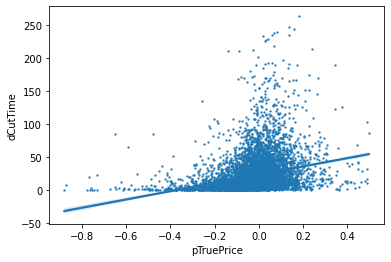

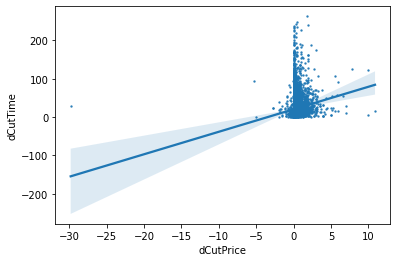

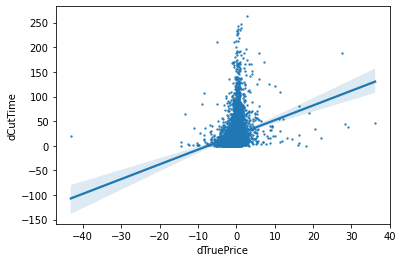

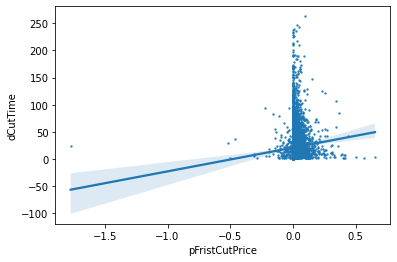

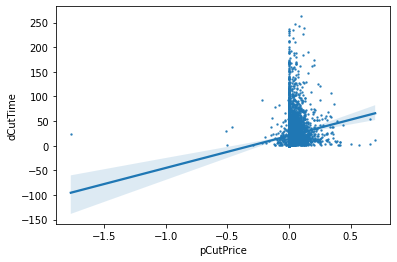

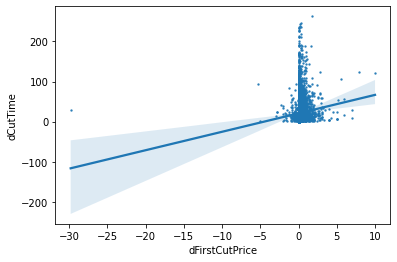

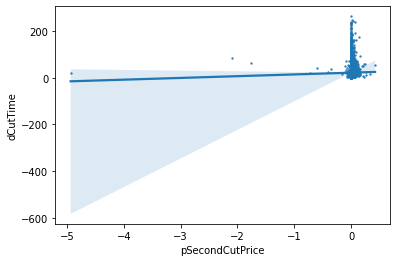

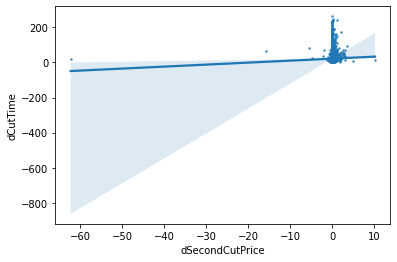

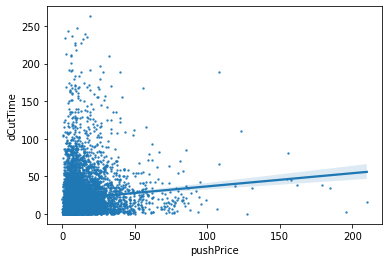

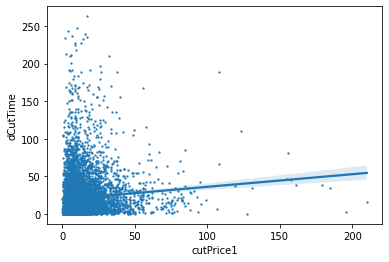

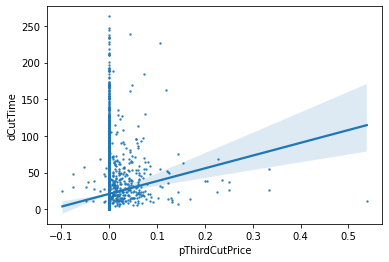

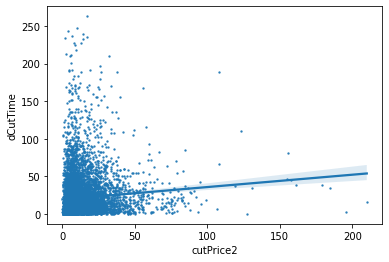

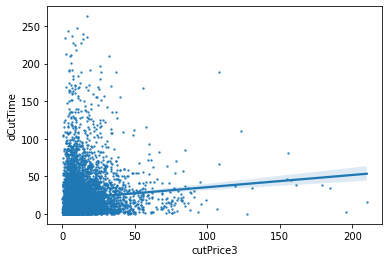

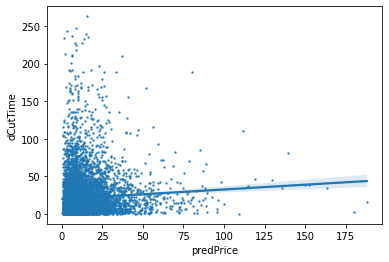

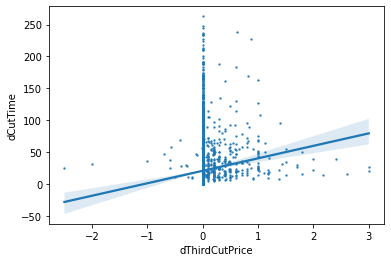

<Figure size 432x288 with 0 Axes>

In [461]:
contin_feature = influ_features[:]
contin_feature.remove('cutNum')
contin_feature.remove('isCut')

num_bins = int(np.floor(1 + np.log2(len(df))))


for i, feature in enumerate(contin_feature):
    feature_df = df[[feature, 'dCutTime']]

    sns.regplot(x = feature, y = 'dCutTime', data=feature_df,scatter_kws={'s':2})
    plt.show()
    plt.cla()
    plt.clf()

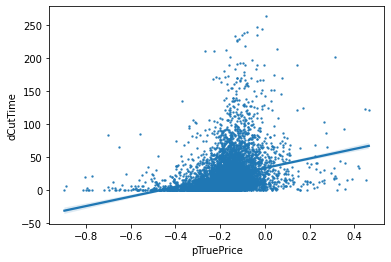

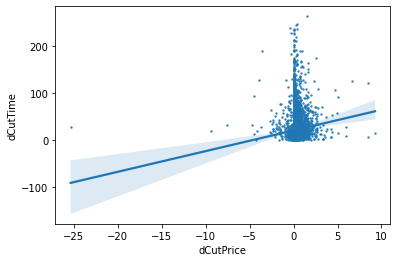

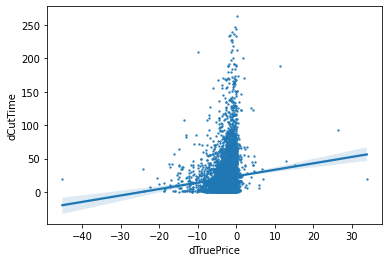

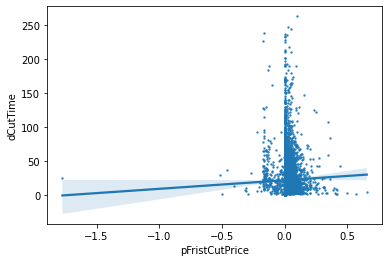

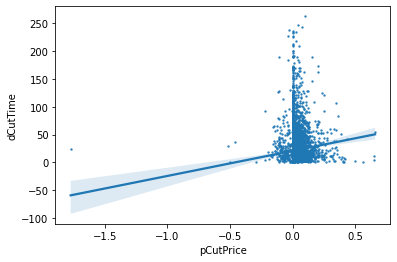

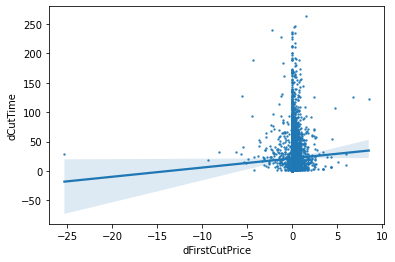

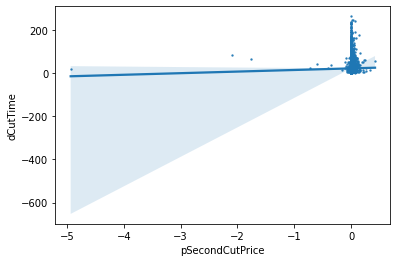

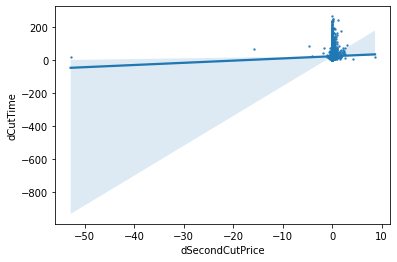

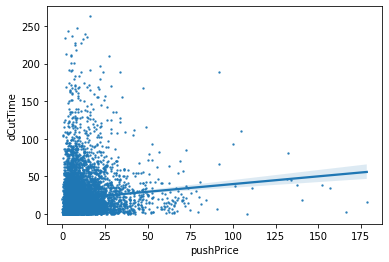

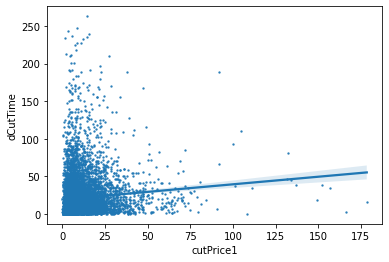

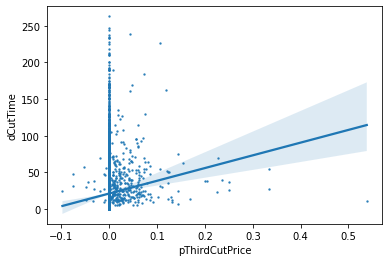

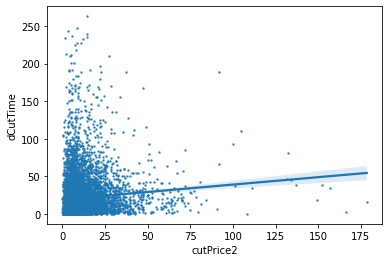

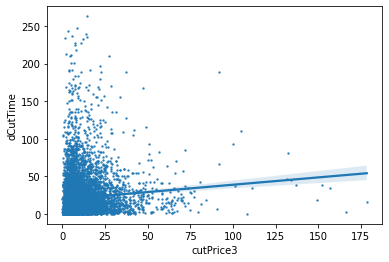

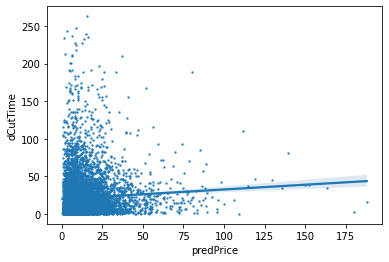

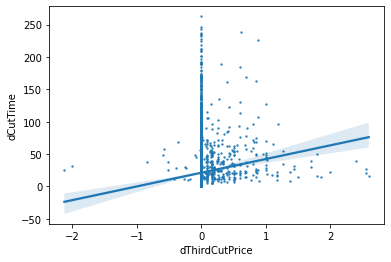

<Figure size 432x288 with 0 Axes>

In [463]:
contin_feature = influ_features[:]
contin_feature.remove('cutNum')
contin_feature.remove('isCut')

num_bins = int(np.floor(1 + np.log2(len(df))))


for i, feature in enumerate(contin_feature):
    feature_df = df2[[feature, 'dCutTime']]
    sns.regplot(x = feature, y = 'dCutTime', data=feature_df,scatter_kws={'s':2})
    plt.show()
    plt.cla()
    plt.clf()

In [433]:
train_df = pd.read_csv('input/inputTrain.csv').drop(columns=['Unnamed: 0', 'price'])
train_df

,carid,tradeTime,mileage,color_1,color_2,color_3,color_4,color_5,color_6,color_7,...,cityId7,l1,l2,l3,l4,l5,l6,l7,l8,l9
0,1,0.840336,-0.534415,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.230769,-1.080000,0.668317,-1.230769,-1.080000,0.668317,-1.175993,-0.247441,0.229515
1,2,0.827731,0.315772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.062678,-0.613333,-0.049505,-0.062678,-0.613333,-0.049505,-0.271037,-0.252904,-0.226296
2,5,0.802521,1.028558,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.390313,-1.280000,-0.222772,-0.390313,-1.280000,-0.222772,-0.715401,-0.604505,-0.531781
3,6,0.844538,-0.089701,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.433048,0.173333,1.074257,-0.433048,0.173333,1.074257,-0.235116,0.635244,0.918661
4,7,0.848739,-0.154414,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.960114,-0.506667,0.574257,-0.960114,-0.506667,0.574257,-0.813323,-0.169895,0.311352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,18531,0.701681,0.538139,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.017094,-1.546667,0.396040,-1.017094,-1.546667,0.396040,-1.196486,-0.369935,-0.112968
29995,4294,-0.798319,0.680581,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.877493,0.320000,-0.049505,0.877493,0.320000,-0.049505,0.693357,0.270279,0.009225
29996,20584,-0.310924,0.478198,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.037037,-1.613333,0.099010,0.037037,-1.613333,0.099010,-0.568485,-0.047498,-0.362698
29997,11490,-0.130252,0.441610,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.749288,-0.013333,-0.198020,0.749288,-0.013333,-0.198020,0.480517,0.040985,-0.199016


In [434]:
df = pd.merge(df, train_df, on='carid')
df2=pd.merge(df2, train_df, on='carid')
print(df.columns)
print(df2.columns)


Index(['carid', 'pushPrice', 'predPrice', 'isCut', 'cutNum', 'cutPrice1',
       'cutPrice2', 'cutPrice3', 'dFirstCutTime', 'dSecondCutTime',
       ...
       'cityId7', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9'],
      dtype='object', length=173)
Index(['carid', 'pushPrice', 'predPrice', 'isCut', 'cutNum', 'cutPrice1',
       'cutPrice2', 'cutPrice3', 'dFirstCutTime', 'dSecondCutTime',
       ...
       'cityId7', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9'],
      dtype='object', length=173)


In [435]:
X = df.drop(columns=['carid', 'dCutTime', 'pFirstAllTime', 'pSecondAllTime']).to_numpy()
X2=df2.drop(columns=['carid', 'dCutTime', 'pFirstAllTime', 'pSecondAllTime']).to_numpy()
print(X.shape)
print(X2.shape)
y = df['dCutTime'].values
y2 = df['dCutTime'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

(7952, 169)
(7973, 169)


In [436]:
print(X2)

[[ 3.383       4.5711882   0.         ... -0.26550685 -0.17967555
  -0.13663427]
 [ 3.825       5.32646985  0.         ... -1.04750386 -0.30444042
   0.36514464]
 [20.315      24.26049018  1.         ...  1.1625365   0.49993358
   0.20945723]
 ...
 [ 3.4         3.67720669  1.         ... -0.87814388 -0.55451969
  -0.50111509]
 [ 4.148       4.92898836  0.         ...  0.25196533  1.51985611
   1.06418414]
 [ 5.1         6.04155667  0.         ... -2.18897141 -1.50328436
  -0.39702643]]


In [437]:
y_test[0:10]

array([ 7, 24,  7, 24, 10, 22, 31, 46, 13, 16], dtype=int64)

In [438]:
df['trade_class'] = 0
df['trade_class'][df['dCutTime'].values <= 7] = 1
df['trade_class'][np.logical_and(df['dCutTime'].values >= 7, df['dCutTime'].values <= 14)] = 2
df['trade_class'][np.logical_and(df['dCutTime'].values >= 14, df['dCutTime'].values <= 21)] = 3
df['trade_class'][np.logical_and(df['dCutTime'].values >= 28, df['dCutTime'].values <= 35)] = 4
df['trade_class'][np.logical_and(df['dCutTime'].values >= 35, df['dCutTime'].values <= 42)] = 5
df['trade_class'][df['dCutTime'] > 42] = 6
df2['trade_class'] = 0
df2['trade_class'][df2['dCutTime'].values <= 7] = 1
df2['trade_class'][np.logical_and(df2['dCutTime'].values >= 7, df2['dCutTime'].values <= 14)] = 2
df2['trade_class'][np.logical_and(df2['dCutTime'].values >= 14, df2['dCutTime'].values <= 21)] = 3
df2['trade_class'][np.logical_and(df2['dCutTime'].values >= 28, df2['dCutTime'].values <= 35)] = 4
df2['trade_class'][np.logical_and(df2['dCutTime'].values >= 35, df2['dCutTime'].values <= 42)] = 5
df2['trade_class'][df2['dCutTime'] > 42] = 6
df

,carid,pushPrice,predPrice,isCut,cutNum,cutPrice1,cutPrice2,cutPrice3,dFirstCutTime,dSecondCutTime,...,l1,l2,l3,l4,l5,l6,l7,l8,l9,trade_class
0,68603,3.9800,4.571188,0,0,3.9800,3.9800,3.9800,0.0,0.0,...,-0.091168,-0.546667,0.039604,-0.091168,-0.546667,0.039604,-0.265507,-0.179676,-0.136634,1
1,12312,4.5000,5.326470,0,0,4.5000,4.5000,4.5000,0.0,0.0,...,-1.301994,-0.546667,0.653465,-1.301994,-0.546667,0.653465,-1.047504,-0.304440,0.365145,4
2,57655,23.9000,24.260490,1,1,23.0000,23.0000,23.0000,23.0,0.0,...,1.202279,0.960000,-0.004950,1.202279,0.960000,-0.004950,1.162537,0.499934,0.209457,0
3,45688,20.5798,26.192541,0,0,20.5798,20.5798,20.5798,0.0,0.0,...,-0.883191,-0.266667,-0.980198,-0.883191,-0.266667,-0.980198,-0.682770,-1.583932,-0.908554,1
4,52081,12.2800,12.397629,1,1,11.9000,11.9000,11.9000,21.0,0.0,...,-0.233618,0.320000,0.891089,-0.233618,0.320000,0.891089,-0.050445,0.582111,0.806156,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,1069,11.3800,11.852209,1,1,11.0000,11.0000,11.0000,13.0,0.0,...,-0.008547,-0.280000,-0.366337,-0.008547,-0.280000,-0.366337,-0.116033,-0.541508,-0.404074,2
7948,38017,9.6800,9.051764,1,1,9.3800,9.3800,9.3800,2.0,0.0,...,-0.062678,-0.613333,-0.049505,-0.062678,-0.613333,-0.049505,-0.271037,-0.252904,-0.226296,6
7949,27175,4.0000,3.677207,1,1,3.8000,3.8000,3.8000,2.0,0.0,...,-0.509972,-1.533333,-0.103960,-0.509972,-1.533333,-0.103960,-0.878144,-0.554520,-0.501115,2
7950,49633,4.8800,4.928988,0,0,4.8800,4.8800,4.8800,0.0,0.0,...,0.478632,-0.146667,1.361386,0.478632,-0.146667,1.361386,0.251965,1.519856,1.064184,1


In [439]:
X = df.drop(columns=['carid', 'dCutTime', 'trade_class']).to_numpy()
X2 = df2.drop(columns=['carid', 'dCutTime', 'trade_class']).to_numpy()
y2 = df['trade_class'].values
y = df['trade_class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.9)

In [440]:
parameters = {
    'max_depth'        : np.arange(5,8),
    'n_estimators'     : np.arange(10,40,5),
    'gamma'            : [0.1,0.2,0.3,0.4],
    'alpha'            :np.arange(0.5,1.5,0.2)
}
result_dic={}

In [441]:
grid = RandomizedSearchCV(xgb.XGBClassifier(), parameters, cv=10, return_train_score=True, verbose=3)
grid.fit(X, y)
print(grid.best_params_)




Fitting 10 folds for each of 10 candidates, totalling 100 fits
[14:13:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END alpha=1.0999999999999999, gamma=0.1, max_depth=6, n_estimators=20;, score=(train=0.690, test=0.535) total time=   0.9s
[14:13:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/10] END alpha=1.0999999999999999, gamma=0.1, max_depth=6, n_estimators=20;, score=(train=0.692, test=0.562) total time=   0.9s
[14:13:50] WARNING: C:/Users/Administrator/worksp

In [442]:
grid.best_params_

{'n_estimators': 20, 'max_depth': 7, 'gamma': 0.2, 'alpha': 1.0999999999999999}

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = xgb.XGBClassifier(**grid.best_params_)
model.fit(X,y)
model.predict(X)
result_dic['XGBClassifier'] = (model.score(X_test,y_test), grid.best_params_)



[14:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [444]:
print(model.score(X_test,y_test))

0.7288732394366197


In [445]:
yucede1 = model.predict(X)
yucede1[:10]

array([1, 4, 0, 1, 6, 6, 1, 1, 1, 2], dtype=int64)

In [446]:
print(len(X[0]))
print(len(X2[0]))

171
171


In [447]:
yucede2=model.predict(X2)



In [453]:
data1=[0]*7
data2=[0]*7
for i in yucede1:
    data1[i]+=1
for i in yucede2:
    
    data2[i]+=1

In [457]:

print(sum(data2[1:]))

7724


In [449]:
print(data1)
print(data2)
data2=pd.DataFrame(data2)
data2=data2.drop([0])
data1=pd.DataFrame(data1)
data1=data1.drop([0])

[363, 3735, 1494, 699, 351, 254, 1056]
[249, 5369, 739, 592, 256, 170, 598]


(0.0, 6000.0)

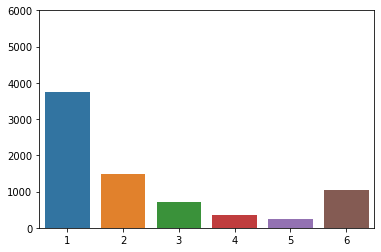

In [450]:
g=sns.barplot(data=data1.T)
g.set_ylim(0,6000)


(0.0, 6000.0)

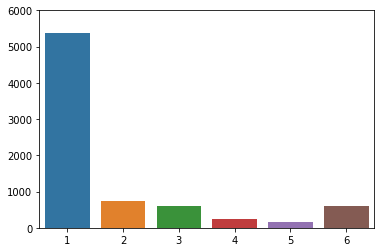

In [451]:
g=sns.barplot(data=data2.T)
g.set_ylim(0,6000)

In [452]:
print(X2)

[[ 3.383       4.5711882   0.         ... -0.26550685 -0.17967555
  -0.13663427]
 [ 3.825       5.32646985  0.         ... -1.04750386 -0.30444042
   0.36514464]
 [20.315      24.26049018  1.         ...  1.1625365   0.49993358
   0.20945723]
 ...
 [ 3.4         3.67720669  1.         ... -0.87814388 -0.55451969
  -0.50111509]
 [ 4.148       4.92898836  0.         ...  0.25196533  1.51985611
   1.06418414]
 [ 5.1         6.04155667  0.         ... -2.18897141 -1.50328436
  -0.39702643]]
